# Séance 2

## Objectifs de la séance

- Etude de système d’ordre 2
- Analyse de la réponse indicielle
- Influence de zeta sur les caractéristiques temporelles : dépassement, temps de réponse, …
- Lien entre ces caractéristiques et la position des pôles

In [1]:
from IPython.display import Image, display, Markdown

from control import matlab as ml  # Python Control Systems Toolbox (compatibility with MATLAB)
import numpy as np              # Library to manipulate array and matrix
import matplotlib.pyplot as plt # Library to create figures and plots
import math # Library to be able to do some mathematical operations
import ReguLabFct as rlf # Library useful for the laboratory of regulation of HELMo Gramme

## Réponse indicielle du $2^{nd}$ ordre générale paramétrée

Soit un système du second degré : 
$
 G(p)=\frac{K}{(\frac{p}{\omega_n})^2+\frac{2\zeta}{\omega_n}p+1}
$
(cfr page 3-6)

Analysez pour les valeurs caractéristiques de zeta : 0.1 0.2 0.3 0.42 0.5 0.6 0.7 0.8 1 1.41 2 6 10 les réponses typiques cfr la page 3-9.
Créez un script qui permette de tracer de manière itérative les différentes fonctions dont les différents zeta seront encodés dans une liste.

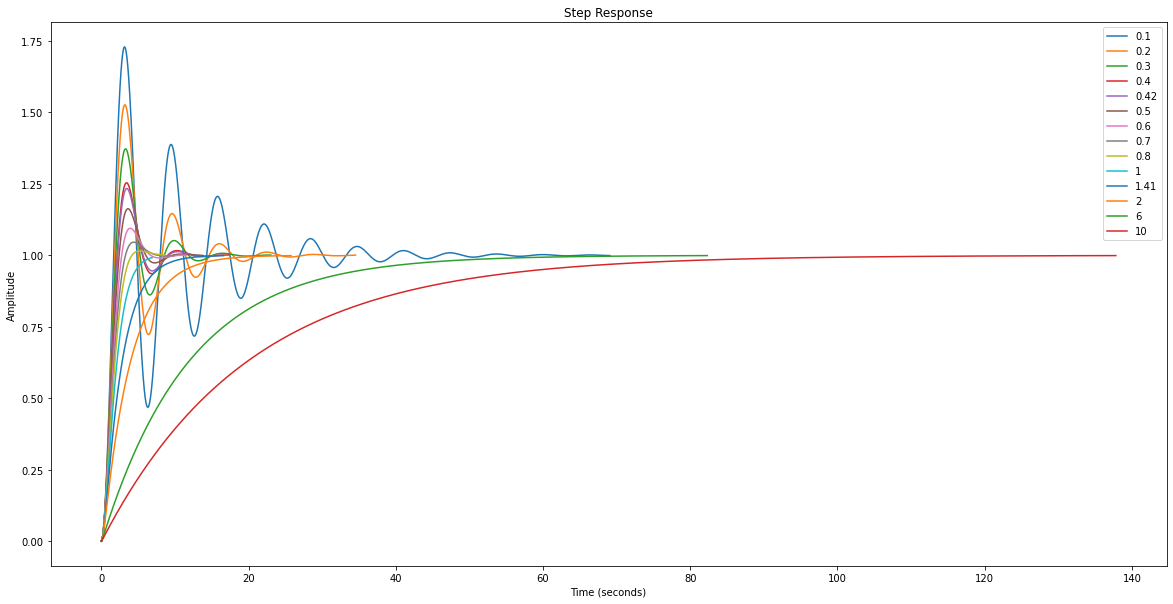

In [2]:
K=1
wn=1

# Définition des coefficients d'amortissement
zeta_values =[0.1, 0.2, 0.3, 0.4, 0.42, 0.5, 0.6, 0.7, 0.8, 1, 1.41, 2, 6, 10]

# Création de la fenêtre à une taille donnée
fig = plt.figure("Steps",figsize=(20,10))
ax = fig.subplots()

# Réponse indicielle
# Calcule les différentes fonctions de transfert ainsi que la réponse indicielle
for zeta in zeta_values: 
    G = ml.tf(K, [(1/wn)**2, 2*zeta/wn, 1]) # Calcul de la fonction de transfert
    rlf.step_(G, NameOfFigure='Steps', sysName=zeta); # Traçage de la réponse indicielle

### Commentaires sur les courbes

.....................................................

.....................................................

:::{toggle}
- **Si $\zeta < 1$ :** Il y a un dépassement et celui-ci est d'autant plus grand que $\zeta$ est faible.

- **Si $\zeta \geqslant 1$ :** Il n'y a pas de dépassement (système suramorti).

*(cf. page 3-9)*
:::

### Dépassement

Visualisez la valeur du dépassement pour les différentes valeurs de zeta et regardez l’influence de zeta sur la valeur du dépassement sur l’abaque de la page 3-11 : D ....... si zeta ......

:::{toggle}
D $\searrow$ si $\zeta \nearrow$
:::

Observez que les échelles de cet abaque sont logarithmiques. Par exemple, observez la valeur du dépassement lorsque zeta=0.5, sur la figure et indiquez clairement la position de ce point sur l’abaque.

![Abaque_Depassement](../images/Abaque_Depassement.png)

Vérifiez par calcul :

$
 D_p=100*e^{-\frac{k\pi\zeta}{\sqrt{1-\zeta^2}}}
$

::::{toggle}

:::{image} ../images/2_Depassement_exemple.png
:alt: Depassement_exemple
:align: center
:::

&nbsp;

Par calcul: $D_p=16.3\%$
::::

### Pseudo pulsation

Observez l’influence du coefficient d'amortissement sur la pulsation d’oscillation $\omega_d$ : $\omega_d$ ... si $\zeta$ ...

:::{toggle}
$\omega_d \nearrow$ si $\zeta \searrow$

- **Si $\zeta < 1$ :** Il y a des oscillations et celles-ci sont d'autant plus grandes que $\zeta$ est faible.

- **Si $\zeta \geqslant 1$ :** Il n'y a pas d'oscillations.

*(cf. page 3-6 à 3-7)*
:::

### Temps de réponse à 5%

Visualisez la valeur du temps de réponse à 5 % pour les différentes valeurs de $\zeta$ et regardez l’influence de $\zeta$ sur l’abaque de la page 3-12.

![Abaque_tr5](../images/Abaque_tr5.png)

Expliquez l’allure particulière de cette courbe :
- si $\zeta$ > 0.7: ...
- en $\zeta$ = 0.7: ...
- si $\zeta$ < 0.7: « escaliers » dans la partie gauche car ...

::::{toggle}
- si $\zeta$ > 0.7: comportement d'un système d'ordre 1.
- en $\zeta$ = 0.7: le système possède le $t_{r_{5\%}}$ le plus faible possible => **système le plus rapide** à se stabiliser possible.
- si $\zeta$ < 0.7: « escaliers » dans la partie gauche car il y a des oscillations qui font sortir le système de la plage des 5% de tolérance autour de la valeur atteinte en régime établi. 

:::{note}
Le nombre de "marches" équivaut au nombre de dépassements des valeurs limites 0.95 et 1.05.
:::
::::

Pourquoi le $t_{r_{5\%}}$ est-il "identique" pour un $\zeta$ de 0,6 ou 0,5 ?

:::{toggle}
Le $t_{r_{5\%}}$ est "identique" pour un $\zeta$ de 0,6 ou 0,5 car ils se trouvent sur la même "marche".
:::

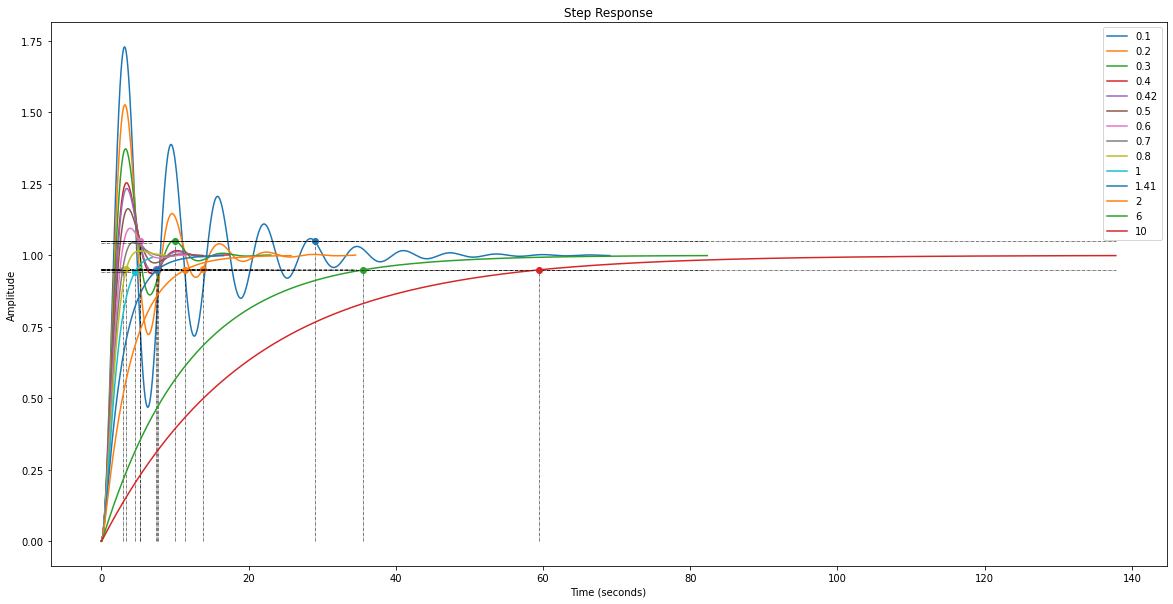

In [3]:
K=1
wn=1

# Définition des coefficients d'amortissement
zeta_values =[0.1, 0.2, 0.3, 0.4, 0.42, 0.5, 0.6, 0.7, 0.8, 1, 1.41, 2, 6, 10]

# Création de la fenêtre à une taille donnée
fig = plt.figure("Steps",figsize=(20,10))
ax = fig.subplots()

# Réponse indicielle
# Calcule les différentes fonctions de transfert ainsi que la réponse indicielle
for zeta in zeta_values: 
    G = ml.tf(K, [(1/wn)**2, 2*zeta/wn, 1]) # Calcul de la fonction de transfert
    rlf.stepWithInfo(G, NameOfFigure='Steps', sysName=zeta, plot_rt=False, plot_overshoot=False, plot_DCGain=False); # Traçage de la réponse indicielle avec juste le point du tr5%

### Position des pôles

Vous pouvez faire le lien entre l’allure de la réponse indicielle et la position des pôles dans le plan complexe tracé par la fonction `pzmap(h)`.

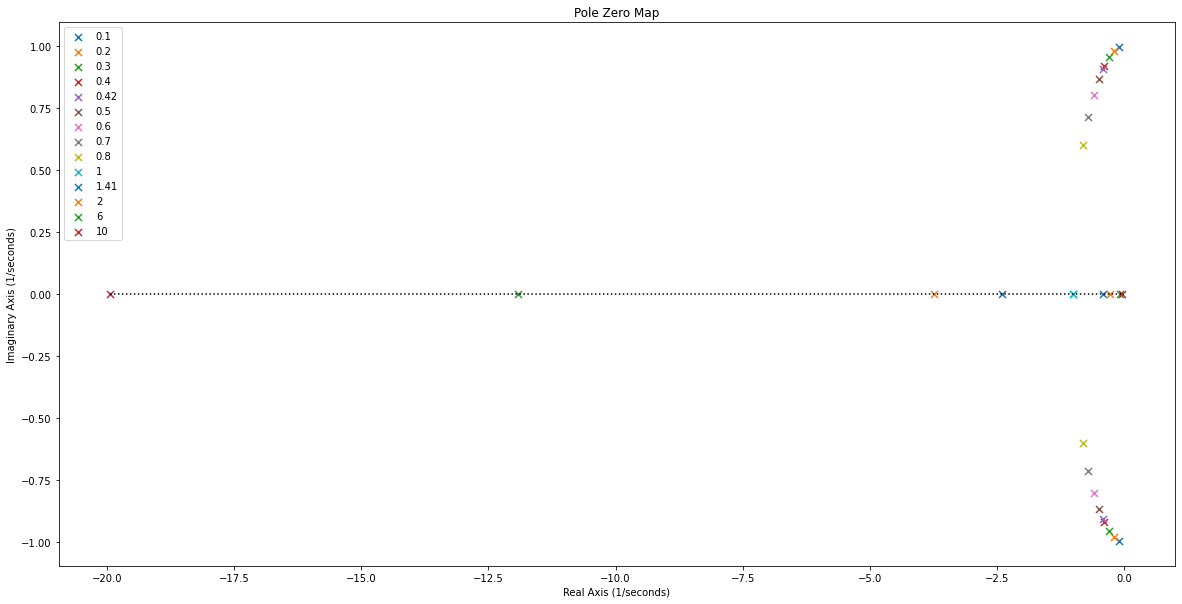

In [4]:
# Création de la fenêtre à une taille donnée
fig = plt.figure("Pole Zero Map",figsize=(20,10))
ax = fig.subplots()

# Pour pouvoir boucler sur lnombrees couleurs standards afin de directement jouer avec les couleurs des graphes
from itertools import cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])

# Trace les poles et zéros pour chacune des fonctions de transfert stockées dans 'g'
for zeta in zeta_values: 
    G = ml.tf(K, [(1/wn)**2, 2*zeta/wn, 1]) # Calcul de la fonction de transfert
    poles, zeros = rlf.pzmap(G, NameOfFigure="Pole Zero Map", sysName=zeta, color=next(colors));
plt.plot([poles.real[0], 0], [0, 0], 'k:'); # Ligne horizontale passant par 0 pour marquer l'axe des imaginaires

Pour chaque valeur de $\zeta$, la fonction `pzmap` vous trace 2 croix pour indiquer les 2 pôles du système dans le plan complexe :

- Pour $\zeta=10$, les pôles sont en : ......... et .........

  C’est le pôle en ......... qui domine dans le tracé de la réponse indicielle car .........
 
- Si $\zeta$ $\searrow$ jusque $\zeta=1$, les pôles se déplacent .........
- Si $\zeta<1$, les pôles deviennent .........
- Si $\zeta$ $\searrow$ encore, les pôles se déplacent .........

:::{toggle}
- Pour $\zeta=10$, les pôles sont en : -19.9 et -0.05

  C’est le pôle en -0.05 qui domine dans le tracé de la réponse indicielle car $\tau=\frac{-1}{p}$. La constante de temps est donc plus grande.
  
- Si $\zeta$ $\searrow$ jusque $\zeta=1$, les pôles se déplacent sur l'axe des réels (vers la gauche pour les pôles dominants, vers la droite pour les autres).

- Si $\zeta<1$, les pôles deviennent complexes conjugués.

- Si $\zeta$ $\searrow$ encore, les pôles se déplacent sur l'axe des imaginaires et l'axe des réels. La valeur absolue de la partie imaginaire (*oscillations*) $\nearrow$, et la valeur absolue de la partie réelle (*amortissement*) $\searrow$.
:::

Observez l’influence des pôles réels par rapport aux pôles complexes : ...

:::{toggle}
Si les pôles du système sont réels alors le système se comporte comme un système du $1^{er}$ ordre $\Rightarrow$ Pas d'oscillations.

Si par contre, ses pôles sont complexes, le système oscille.
:::

&nbsp;

et si $\zeta<0$ : ...

:::{toggle}
Si $\zeta<0$, le système est instable!
:::

&nbsp;

### Exercice 1

Soit un système asservi à retour unitaire décrit par la fonction de transfert :

$$
H_{BF}(s) = \frac{8}{s^2+s+10}
$$

#### Etude de la réponse indicielle

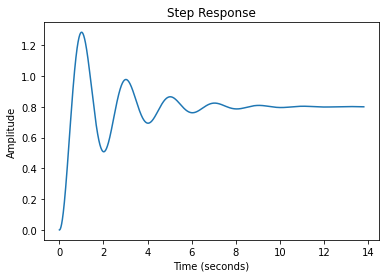

In [5]:
num = 8
den = [1, 1, 10]
H_BF = ml.tf(num, den)
rlf.step_(H_BF);

La fonction présente 2 pôles complexes conjugués et les constantes associées à sa réponse sont:

In [6]:
w, zetas, poles = ml.damp(H_BF);

_____Eigenvalue______ Damping___ Frequency_
      -0.5    +3.122j     0.1581      3.162
      -0.5    -3.122j     0.1581      3.162


Vous pouvez le vérifier en identifiant à la représentation canonique (p. 3-6) : ...

:::{toggle}
1°) Mise sour forme canonique:

$$
H_{BF}(s) = \frac{8}{s^2+s+10} = \frac{0.8}{\frac{s^2}{10}+\frac{s}{10}+\mathbf{1}}
$$

2°) Identification:

$$
\begin{alignat*}{2}
\left\{ \begin{aligned}
    \begin{array}{ll}
        \frac{2\zeta}{\omega_n} = \frac{1}{10} \\
        \frac{1}{\omega_n^2} = \frac{1}{10}
    \end{array}
\end{aligned}\right.
\Rightarrow
\left\{ \begin{aligned}
    \begin{array}{ll}
        \zeta = \frac{\sqrt{10}}{20}=0.16 \\
        \omega_n = \sqrt{10} = 3.16
    \end{array}
\end{aligned}\right.
\end{alignat*}\
$$
:::

&nbsp;

&nbsp;

Déterminez les caractéristiques de la réponse par les abaques :
- le dépassement ($D_\%$) = ...............
- le temps de réponse à 5% ($t_{r_{5\%}}$) = ...............

:::{toggle}
- le dépassement ($D_\%$) $\approx$ 60%
- le temps de réponse à 5% ($t_{r_{5\%}}$) $\approx \frac{16}{3.16} = 5$ s
:::

et comparez avec les caractéristiques fournies par `stepWithInfo` :
- la valeur atteinte en régime établi (DCGain) = ...............
- l’erreur statique ($\varepsilon_0$) = ...............
- le temps de réponse à 5% ($t_{r_{5\%}}$) = ...............
- le temps de montée ($t_m$) = ...............
- le dépassement ($D_\%$) = ...............
- l’instant du premier pic ($t_{peak}$) = ...............

DCGain : 0.7995637249145586
Overshoot : 60.55544633040029
Peak : 1.2837431072325436
PeakTime : 1.005869755595359
RiseTime : 0.36752933377522723
SettlingTime : 5.334702096639671
Erreur statique : 20.043627508544137 %


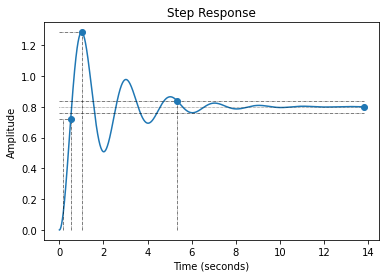

In [7]:
info = rlf.stepWithInfo(H_BF)
rlf.printInfo(info)
print("Erreur statique :", (1-info.DCGain)*100, "%")

### Exercice 2

L’application 2 d’asservissement de position est décrite par le schéma bloc :

:::{image} ../images/2_Appli2.png
:alt: Appli2
:align: center
:::

où A représente un correcteur proportionnel.


La fonction de transfert en BF de l’application d’asservissement de vitesse est :

$$
H_{BF}(p) = \frac{\frac{A}{A+1}}{1+\frac{10,875*10^{-3}}{A+1}p+\frac{1,36*10^{-6}}{A+1}p²}
$$

Utilisez les abaques ou équations pour :

- Prédire l’allure de la réponse indicielle du système si A=99 :
  
  &nbsp;
  
  &nbsp;
  
  &nbsp;
  
  - dépassement : ...............
  
  - temps de réponse : ...............

  :::{toggle}
    $$
    \begin{alignat*}{2}
    \left\{ \begin{aligned}
        \begin{array}{ll}
            \frac{2\zeta}{\omega_n} = \frac{10.875*10^{-3}}{A+1} \\
            \frac{1}{\omega_n^2} = \frac{1.36*10^{-6}}{A+1}
        \end{array}
    \end{aligned}\right.
    \Rightarrow
    \left\{ \begin{aligned}
        \begin{array}{ll}
            \zeta = \frac{10.875*10^{-3}}{100}*\frac{8574.93}{2} = 0.466 \\
            \omega_n = \sqrt{\frac{100}{1.36*10^{-6}}} = 8574.93 rad/s
        \end{array}
    \end{aligned}\right.
    \end{alignat*}\
    $$
    
  - dépassement : 
    $
    D_p=100*e^{-\frac{\pi*0.466}{\sqrt{1-0.466^2}}} = 19.09\%
    $
  - temps de réponse à 5%:
    $
    \frac{5.3}{8574.93} = 618 µs
    $
  :::

  Vérifiez en traçant les réponses via python.

Dépassement : 19.228357919246108 %
Temps de réponse à 5% : 0.0006151343954389906 s


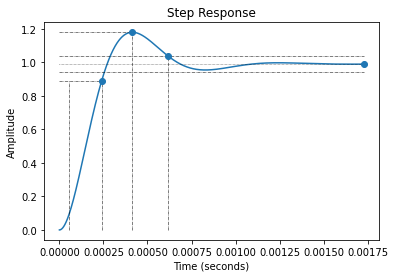

In [8]:
A = 99
num = A/(A+1)
den = [1.36e-6/(A+1), 10.875e-3/(A+1), 1]
H_BF = ml.tf(num, den)
info = rlf.stepWithInfo(H_BF)
print("Dépassement :", info.Overshoot, "%")
print("Temps de réponse à 5% :", info.SettlingTime, "s")

- Déterminer le correcteur A si on veut un dépassement de 40% :
  
  :::{toggle}
  $$
   D_p=100*e^{-\frac{k\pi\zeta}{\sqrt{1-\zeta^2}}} \Rightarrow 40 = 100*e^{-\frac{k\pi\zeta}{\sqrt{1-\zeta^2}}} \Rightarrow \zeta=0.28
  $$
  
  $$
    \begin{alignat*}{2}
    \left\{ \begin{aligned}
        \begin{array}{ll}
            \frac{2*0.28}{\omega_n} = \frac{10.875*10^{-3}}{A+1} \\
            \frac{1}{\omega_n^2} = \frac{1.36*10^{-6}}{A+1}
        \end{array}
    \end{aligned}\right.
    \Rightarrow
    \left\{ \begin{aligned}
        \begin{array}{ll}
            A = 276 \\
            \omega_n = 14279 rad/s
        \end{array}
    \end{aligned}\right.
    \end{alignat*}\
    $$
  :::

  
  &nbsp;
  
  &nbsp;
  
  &nbsp;
  
  &nbsp;
  
  Vérifiez en traçant les réponses via python.

Dépassement : 39.95296631023082 %


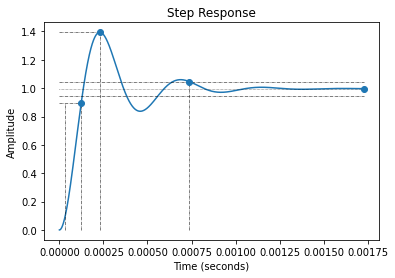

In [9]:
A = 276
num = A/(A+1)
den = [1.36e-6/(A+1), 10.875e-3/(A+1), 1]
H_BF = ml.tf(num, den)
info = rlf.stepWithInfo(H_BF)
print("Dépassement :", info.Overshoot, "%")